In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import sqlite3

In [8]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect('database.sqlite')

In [9]:
type(con)

sqlite3.Connection

In [10]:
df = pd.read_sql_query('SELECT * FROM REVIEWS ', con)

In [13]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [17]:
df.shape

(568454, 10)

In [18]:
type(df)

pandas.core.frame.DataFrame

In [19]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [21]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']] # having rows with num > deno

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [22]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']] # removing invalid rows

In [23]:
df_valid

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [24]:
df_valid.shape

(568452, 10)

In [26]:
df_valid.duplicated(['UserId','ProfileName','Text','Time'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [34]:
# data = df_valid[df_valid.drop_duplicates(subset=['UserId','ProfileName','Text','Time'])]

# The syntax is incorrect because of combining drop_duplicates() and indexing. 
# Specifically, drop_duplicates() returns a DataFrame


data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text'])

In [29]:
data.shape

(174521, 10)

In [39]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [ ]:
#chnaging time to timestamp datatype
pd.to_datetime(data['Time'])

### as default is : unix start time "1970-01-01"

### 00:00:01.303862400 ->> by-default this time is in "nano-second" as default value of unit = "ns"
### so lets customize "unit" parameter to get time in second ..

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [43]:
data['Time'] = pd.to_datetime(data['Time'] , unit='s')

C:\Users\anshi\AppData\Local\Temp\ipykernel_37512\2920101369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] = pd.to_datetime(data['Time'] , unit='s')


In [44]:
data['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393931, dtype: datetime64[ns]

In [45]:
import warnings

In [46]:
from warnings import filterwarnings
filterwarnings('ignore')

## 3.. Analyse to what User Amazon Can recommend more product ? 

In [49]:
data['UserId'].nunique()

256059

In [ ]:
data.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'})  # value passed in group by is given as index

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [52]:
recdf = data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  }).sort_values(by= 'ProductId', ascending=False)

In [53]:
recdf

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [57]:
#renaming these columns
recdf.columns = ['Number_of_summaries' , 'num_text' , 'avg_score' , 'No_of_prods_purchased']

In [58]:
recdf

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [61]:
recdf.index

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR',
       ...
       'AZZ7YP08I4OZ6', 'AZZ7SCDDZR0R3', 'A1HS3BUBNZJJD6', 'AZZ6JYUIZOISQ',
       'AZZ6D6EV3FL8V', 'A1HRZKUDP9GC8', 'A1HRZ2C8FH70YF', 'AZZ58AJ3HJCK8',
       'AZZ556B2VPA1C', '#oc-R10UA029WVWIUI'],
      dtype='object', name='UserId', length=256059)

In [62]:
recdf.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [63]:
recdf['No_of_prods_purchased'][0:10]

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
AZV26LP92E6WU     129
AKMEY1BSHSDG7     119
A2GEZJHBV92EVR    118
Name: No_of_prods_purchased, dtype: int64

In [64]:
recdf['No_of_prods_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

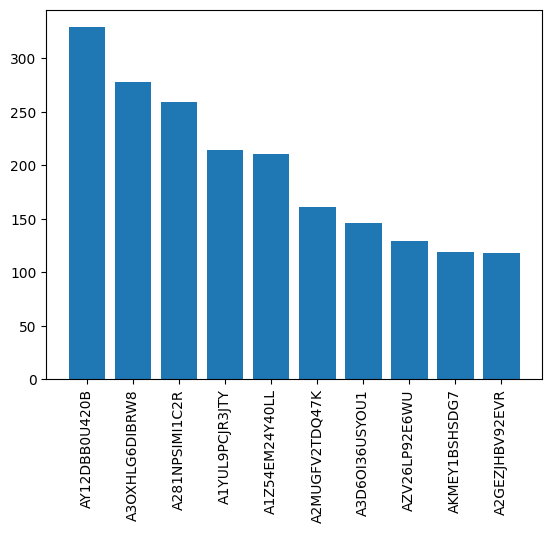

In [69]:
plt.bar(recdf.index[0:10], recdf['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')

## 4.. which product has good number of reviews ? 

In [70]:
data['ProductId'].nunique()

67624

In [74]:
data['ProductId'].value_counts()

ProductId
B007JFMH8M    912
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    566
B0013NUGDE    558
             ... 
B006SQBRMA      1
B001EO5TPM      1
B001RN2W4Q      1
B004BRECP2      1
B0001PB9FE      1
Name: count, Length: 67624, dtype: int64

In [75]:
prod_count = data['ProductId'].value_counts().to_frame()

In [76]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B006SQBRMA,1
B001EO5TPM,1
B001RN2W4Q,1


In [77]:
prod_count['count'] > 500

ProductId
B007JFMH8M     True
B002QWP89S     True
B003B3OOPA     True
B001EO5Q64     True
B0013NUGDE     True
              ...  
B006SQBRMA    False
B001EO5TPM    False
B001RN2W4Q    False
B004BRECP2    False
B0001PB9FE    False
Name: count, Length: 67624, dtype: bool

In [ ]:
prod_count_600 = prod_count[prod_count['count'] > 500]

In [82]:
prod_count_600

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [88]:
frequency= prod_count_600.index

In [85]:
frequency

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [89]:
## lets separate dataframe of most sold products only !

In [92]:
data['ProductId'].isin(frequency)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [93]:
data[data['ProductId'].isin(frequency)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [95]:
frequency= data[data['ProductId'].isin(frequency)]

<Axes: xlabel='count', ylabel='ProductId'>

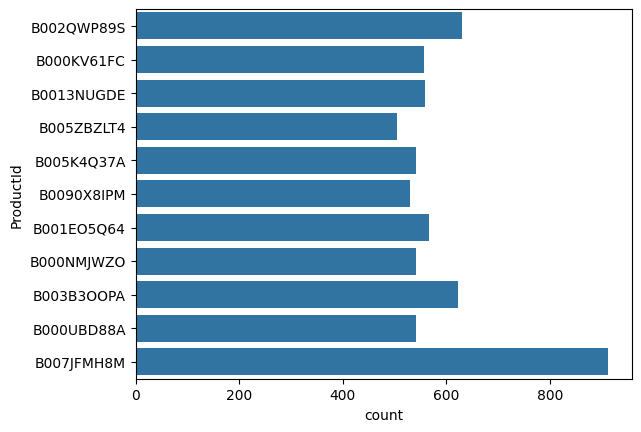

In [97]:
sns.countplot(y= 'ProductId', data= frequency)

<Axes: xlabel='count', ylabel='ProductId'>

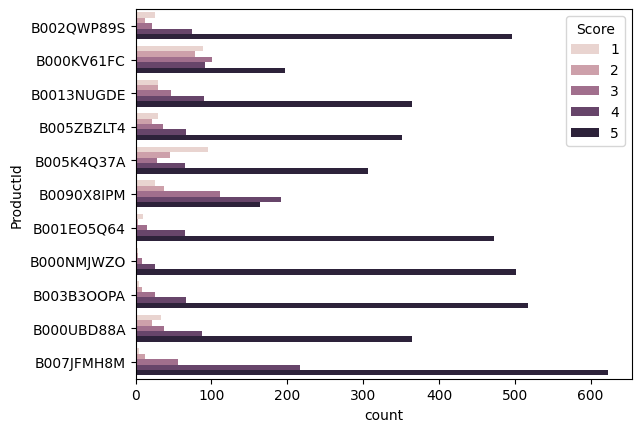

In [98]:
sns.countplot(y= 'ProductId', data= frequency, hue='Score')

## 5.. Is there any difference between behaviour of frequent viewers & not frequent viewers ?

In [99]:
data['UserId']

0         A3SGXH7AUHU8GW
1         A1D87F6ZCVE5NK
2          ABXLMWJIXXAIN
3         A395BORC6FGVXV
4         A1UQRSCLF8GW1T
               ...      
568449    A28KG5XORO54AY
568450    A3I8AFVPEE8KI5
568451    A121AA1GQV751Z
568452     A3IBEVCTXKNOH
568453    A3LGQPJCZVL9UC
Name: UserId, Length: 393931, dtype: object

In [100]:
data['UserId'].value_counts()

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
A1FVF43OQJE2AH      1
A1MNIZYWGVRVGF      1
A2CLE7G5FK24AU      1
A10R47UIIJHJQT      1
A25RYX4NFWDJ2N      1
Name: count, Length: 256059, dtype: int64

In [106]:
user_counts = data['UserId'].value_counts()

In [109]:
user_counts.to_frame()

,count
UserId,
AY12DBB0U420B,329
A3OXHLG6DIBRW8,278
A281NPSIMI1C2R,259
A1YUL9PCJR3JTY,214
A1Z54EM24Y40LL,211
...,...
A1FVF43OQJE2AH,1
A1MNIZYWGVRVGF,1
A2CLE7G5FK24AU,1


In [110]:
user_counts.head(7)

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    146
Name: count, dtype: int64

In [111]:
user_counts['AY12DBB0U420B']

np.int64(329)

In [112]:
data["Viewer Type"] = data['UserId'].apply(lambda i: "Frequent" if user_counts[i]> 50 else "Not Frequnt")

In [113]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequnt
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequnt
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequnt
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequnt
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequnt
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...,Not Frequnt
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Not Frequnt


In [114]:
data['Viewer Type'].unique()

array(['Not Frequnt', 'Frequent'], dtype=object)

In [118]:
not_freq= data[data['Viewer Type']=='Not Frequnt']
freq= data[data['Viewer Type']=='Frequent']

In [123]:
freq['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [124]:
not_freq['Score'].value_counts()

Score
5    245196
4     54114
1     35957
3     28872
2     20434
Name: count, dtype: int64

In [125]:
freq['Score'].value_counts()/len(freq)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [126]:
not_freq['Score'].value_counts()/len(freq)*100

Score
5    2620.175251
4     578.264586
1     384.238085
3     308.527463
2     218.358624
Name: count, dtype: float64

<Axes: xlabel='Score'>

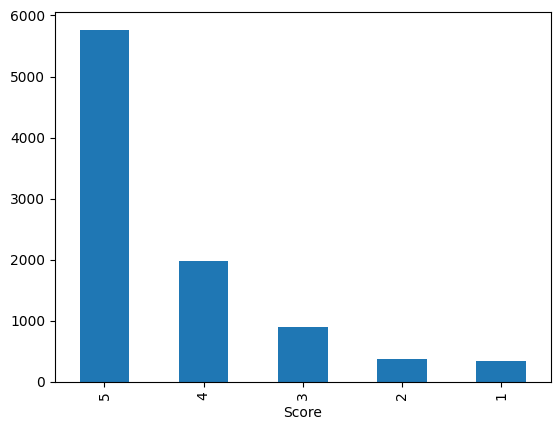

In [128]:
freq['Score'].value_counts().plot(kind='bar')

<Axes: xlabel='Score'>

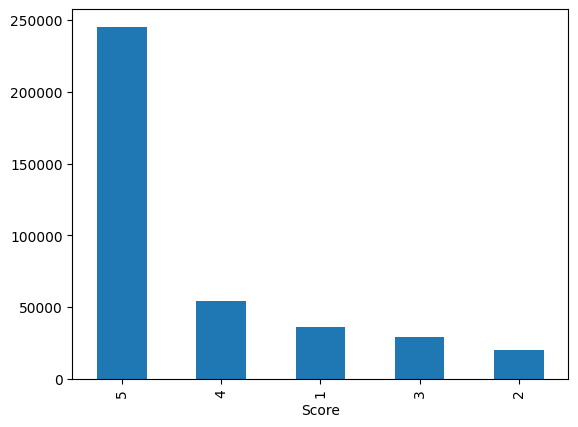

In [129]:
not_freq['Score'].value_counts().plot(kind='bar')

## Are frequent users more verbose ?  ( ie someone who speaks or post alot )

In [130]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [132]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [133]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [134]:
type(data['Text'][0])

str

In [136]:
data['Text'][0].split(' ')

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 '',
 'most.']

In [135]:
type(data['Text'][0].split(' '))

list

In [137]:
len(data['Text'][0].split(' '))

49

In [138]:
def calculate_text_length(text):
    return len(text.split(' '))

In [139]:
data['Text_Length']= data['Text'].apply(calculate_text_length)

In [142]:
data['Viewer Type'].unique()

array(['Not Frequnt', 'Frequent'], dtype=object)

In [145]:
not_freqa = data[data['Viewer Type']=='Not Frequnt']
freq = data[data['Viewer Type']=='Frequent']

In [146]:
not_freqa

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type,Text_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequnt,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequnt,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequnt,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequnt,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequnt,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequnt,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequnt,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequnt,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequnt,37


In [147]:
# define figure so that u can customize as per your need !
fig = plt.figure() 

<Figure size 640x480 with 0 Axes>

(0.0, 600.0)

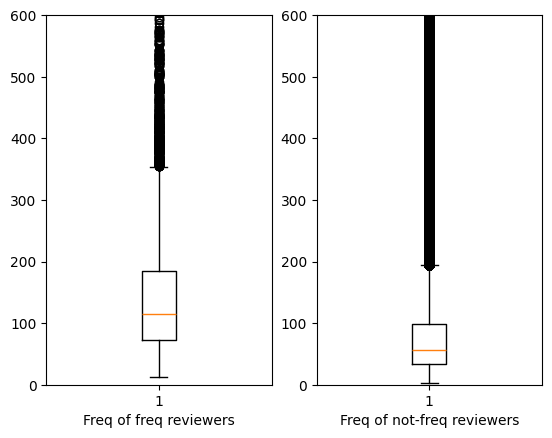

In [151]:
# define figure so that u can customize as per your need !
fig = plt.figure() 

#add subplots
ax1 = fig.add_subplot(121)
ax1.boxplot(freq['Text_Length'])
ax1.set_xlabel('Freq of freq reviewers') ## adding xlabel
ax1.set_ylim(0,600) ## setting limit on y-axis..

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freqa['Text_Length'])
ax2.set_xlabel('Freq of not-freq reviewers')
ax2.set_ylim(0,600)

In [ ]:
# The distributions of word counts for frequent and infrequent reviews shows that 
# infrequent reviewers have a large amount of reviews of low word count.
# On the other hand, the largest concentration of word count is higher 
# for frequent reviewers than for infrequent reviews. 

## sentiment analysis ! 

In [154]:
from textblob import TextBlob

In [155]:
data['Summary']

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 393931, dtype: object

In [156]:
data['Summary'][0]

'Good Quality Dog Food'

In [157]:
TextBlob('Good Quality Dog Food')

TextBlob("Good Quality Dog Food")

In [158]:
TextBlob('Good Quality Dog Food').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [159]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [160]:
data.shape

(393931, 12)

In [162]:
sample =data[0:50000]

In [163]:
polarity =[]

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)    

In [164]:
polarity

[0.7,
 0.0,
 0.0,
 0.0,
 0.8,
 0.6,
 0.35833333333333334,
 1.0,
 0.0,
 0.5,
 0.625,
 0.3333333333333333,
 0.13636363636363635,
 0.375,
 0.0,
 0.0,
 -0.4,
 0.625,
 0.61875,
 0.0,
 0.3,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.8,
 0.0,
 1.0,
 0.0,
 0.5,
 0.35,
 0.4,
 0.5,
 0.640625,
 0.0,
 0.7,
 0.5,
 1.0,
 0.0,
 0.0,
 0.475,
 0.8,
 0.0,
 0.7,
 0.0,
 0.45499999999999996,
 0.0,
 0.0,
 0.4375,
 0.0,
 0.0,
 0.4,
 0.625,
 1.0,
 -0.625,
 0.875,
 0.8,
 0.5,
 -0.125,
 -0.5,
 0.0,
 0.8,
 0.8,
 0.0,
 0.7,
 0.2,
 0.0,
 1.0,
 -0.0625,
 1.0,
 0.0,
 0.35714285714285715,
 0.0,
 0.7,
 0.8,
 -0.3,
 1.0,
 1.0,
 0.8,
 0.0,
 0.1,
 0.0,
 1.0,
 0.8,
 1.0,
 0.625,
 0.8,
 0.45,
 0.8,
 0.7,
 1.0,
 0.0,
 0.6,
 0.8,
 0.4666666666666666,
 0.5,
 -0.6999999999999998,
 0.7,
 0.8,
 0.0,
 0.0,
 0.7,
 1.0,
 -0.6,
 0.0,
 0.0,
 0.7,
 0.0,
 1.0,
 -0.2,
 0.688888888888889,
 0.0,
 1.0,
 0.8,
 0.375,
 0.39999999999999997,
 1.0,
 0.8,
 0.6041666666666666,
 0.7,
 0.5,
 0.5625,
 1.0,
 0.0,
 0.21250000000000005,
 0.5,
 0.0,
 0.300

In [165]:
len(polarity)

50000

In [166]:
sample['polarity'] = polarity

In [168]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer Type,Text_Length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequnt,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequnt,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequnt,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequnt,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequnt,30,0.8


In [169]:
sample['polarity'] < 0 # negative polarity

0        False
1        False
2        False
3        False
4        False
         ...  
54249    False
54250    False
54251     True
54252    False
54253    False
Name: polarity, Length: 50000, dtype: bool

In [170]:
Negative_Text = sample[sample['polarity']< 0]
Positive_Text = sample[sample['polarity']> 0]

In [171]:
from collections import Counter

# is importing the Counter class from the collections module in Python. The Counter is a subclass of the built-in dict class and
#  is used to count the occurrences of items in an iterable, like a list or string.

In [172]:
Counter(Negative_Text['Summary']).most_common(10) ## most used negative keywords

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [173]:
Counter(Positive_Text['Summary']).most_common(10) ## most used negative keywords

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]